In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import feature
from scipy.spatial import distance


In [48]:
img = cv2.imread(r"C:\\Users\\DELL\\Desktop\\Image and video analytics\\images.jpeg")

In [49]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

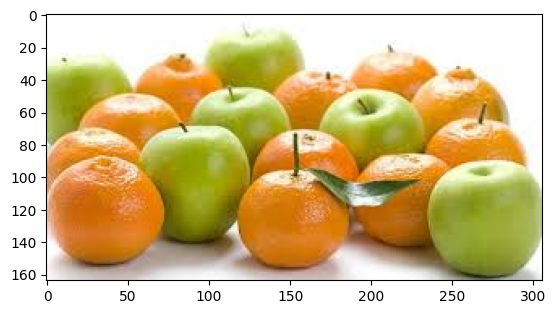

In [50]:
plt.imshow(img)

In [51]:
image = cv2.imread(r'C:\\Users\\DELL\\Desktop\\Image and video analytics\\images.jpeg')

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

orange_lower = np.array([10, 100, 100])
orange_upper = np.array([25, 255, 255])

green_lower = np.array([30, 40, 40])
green_upper = np.array([90, 255, 255])

orange_mask = cv2.inRange(hsv_image, orange_lower, orange_upper)
green_mask = cv2.inRange(hsv_image, green_lower, green_upper)

orange_segmented = cv2.bitwise_and(image, image, mask=orange_mask)
green_segmented = cv2.bitwise_and(image, image, mask=green_mask)

cv2.imwrite(r'C:\Users\DELL\Desktop\ Image and video analytics\segmented /orange_segmented.jpg', orange_segmented)
cv2.imwrite(r'C:\Users\DELL\Desktop\ Image and video analytics\segmented /green_segmented.jpg', green_segmented)


True

In [52]:
apple = cv2.imread(r'C:\Users\DELL\Desktop\Image and video analytics\ segmented/green_segmented.jpg')
orange = cv2.imread(r'C:\Users\DELL\Desktop\Image and video analytics\ segmented/orange_segmented.jpg')

gray1 = cv2.cvtColor(apple, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(orange, cv2.COLOR_BGR2GRAY)

low_threshold = 50
high_threshold = 150

edges1 = cv2.Canny(gray1, low_threshold, high_threshold)
edges2 = cv2.Canny(gray2, low_threshold, high_threshold)

cv2.imwrite(r'C:\Users\DELL\Desktop\Image and video analytics /edge/apple_edge.jpg', edges1)
cv2.imwrite(r'C:\Users\DELL\Desktop\Image and video analytics/edge/orange_edge.jpg', edges2)




True

In [8]:
sobel_x = cv2.Sobel(gray1, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x direction
sobel_y = cv2.Sobel(gray1, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y direction

edges = cv2.magnitude(sobel_x, sobel_y)

edges = cv2.convertScaleAbs(edges)

cv2.imshow('Sobel Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [13]:
apple = cv2.imread(r'C:\Users\DELL\Desktop\Image and video analytics/segmented/green_segmented.jpg')
orange = cv2.imread(r'C:\Users\DELL\Desktop\Image and video analytics/segmented/orange_segmented.jpg')

gray1 = cv2.cvtColor(apple, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(orange, cv2.COLOR_BGR2GRAY)

contours1, _ = cv2.findContours(gray1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("FOR APPLE:")
for contour in contours1:
    area = cv2.contourArea(contour)
    if area > 0:
        perimeter = cv2.arcLength(contour, True)
        compactness = (perimeter ** 2) / (4 * np.pi * area)
        print(f"Object: Area={area:.2f}, Perimeter={perimeter:.2f}, Compactness={compactness:.2f}")

contours2, _ = cv2.findContours(gray2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("\nFOR ORANGE:")
for contour in contours2:
    area = cv2.contourArea(contour)
    if area > 0:
        perimeter = cv2.arcLength(contour, True)
        compactness = (perimeter ** 2) / (4 * np.pi * area)
        print(f"Object: Area={area:.2f}, Perimeter={perimeter:.2f}, Compactness={compactness:.2f}")



FOR APPLE:
Object: Area=1.00, Perimeter=4.00, Compactness=1.27
Object: Area=0.50, Perimeter=3.41, Compactness=1.86
Object: Area=2.00, Perimeter=6.00, Compactness=1.43
Object: Area=5.00, Perimeter=8.83, Compactness=1.24
Object: Area=5.00, Perimeter=8.83, Compactness=1.24
Object: Area=20.00, Perimeter=31.31, Compactness=3.90
Object: Area=3.00, Perimeter=8.83, Compactness=2.07
Object: Area=1.00, Perimeter=4.00, Compactness=1.27
Object: Area=2.00, Perimeter=10.83, Compactness=4.67
Object: Area=5.50, Perimeter=12.24, Compactness=2.17
Object: Area=1.50, Perimeter=5.41, Compactness=1.56
Object: Area=5.00, Perimeter=12.00, Compactness=2.29
Object: Area=6.50, Perimeter=14.24, Compactness=2.48
Object: Area=4.50, Perimeter=9.41, Compactness=1.57
Object: Area=0.50, Perimeter=7.41, Compactness=8.75
Object: Area=0.50, Perimeter=3.41, Compactness=1.86
Object: Area=770.00, Perimeter=381.45, Compactness=15.04
Object: Area=2.00, Perimeter=6.00, Compactness=1.43
Object: Area=4.50, Perimeter=9.41, Compact

In [14]:
image = cv2.imread(r'C:\Users\DELL\Desktop\Image and video analytics/orange.jpg')

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 1. Shape Features
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
area = cv2.contourArea(contours[0])
perimeter = cv2.arcLength(contours[0], True)
circularity = (4 * np.pi * area) / (perimeter ** 2)

# 2. Edge Features
edges = cv2.Canny(gray_image, 100, 200)

# 3. Color Features
hist_h = cv2.calcHist([hsv_image], [0], None, [256], [0, 180])
hist_s = cv2.calcHist([hsv_image], [1], None, [256], [0, 256])
hist_v = cv2.calcHist([hsv_image], [2], None, [256], [0, 256])

# 4. Texture Features
lbp = feature.local_binary_pattern(gray_image, P=8, R=1, method='uniform')
lbp_hist, _ = np.histogram(lbp, bins=np.arange(0, 11), density=True)

print(f"Area: {area}, Perimeter: {perimeter}, Circularity: {circularity}")
print(f"Color Histogram (Hue): {hist_h}, (Saturation): {hist_s}, (Value): {hist_v}")
print(f"LBP Histogram: {lbp_hist}")


Area: 54755.0, Perimeter: 936.0, Circularity: 0.7853838197974155
Color Histogram (Hue): [[1.1388e+04]
 [3.7000e+01]
 [3.3000e+01]
 [0.0000e+00]
 [1.0600e+02]
 [1.4200e+02]
 [0.0000e+00]
 [3.9200e+02]
 [2.8700e+02]
 [3.8000e+02]
 [0.0000e+00]
 [5.6500e+02]
 [8.1300e+02]
 [0.0000e+00]
 [7.9700e+02]
 [7.7500e+02]
 [0.0000e+00]
 [7.1700e+02]
 [1.3590e+03]
 [3.7250e+03]
 [0.0000e+00]
 [1.0651e+04]
 [1.0457e+04]
 [0.0000e+00]
 [5.0350e+03]
 [1.0990e+03]
 [0.0000e+00]
 [6.0600e+02]
 [5.0900e+02]
 [2.2000e+02]
 [0.0000e+00]
 [1.5200e+02]
 [2.0000e+02]
 [0.0000e+00]
 [1.5500e+02]
 [1.1300e+02]
 [7.5000e+01]
 [0.0000e+00]
 [2.9000e+01]
 [3.2000e+01]
 [0.0000e+00]
 [2.0000e+00]
 [1.5820e+03]
 [0.0000e+00]
 [0.0000e+00]
 [3.0000e+00]
 [5.0000e+00]
 [0.0000e+00]
 [1.5000e+01]
 [2.9000e+01]
 [0.0000e+00]
 [1.0000e+02]
 [1.0000e+00]
 [0.0000e+00]
 [8.3000e+01]
 [0.0000e+00]
 [9.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [3.5000e+01]
 [0.0000e+00]
 [6.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [1.4200e+02]
 [

In [53]:
output_dir = r'C:\Users\DELL\Desktop\Image and video analytics/sample/'
os.makedirs(output_dir, exist_ok=True)

image = cv2.imread(r'C:\Users\DELL\Desktop\Image and video analytics\segmented/green_segmented.jpg')  


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

_, thresh = cv2.threshold(blurred, 50, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i, contour in enumerate(contours):
    mask = np.zeros_like(image)
    cv2.drawContours(mask, contours, i, (255, 255, 255), thickness=cv2.FILLED)
    
    segmented_orange = cv2.bitwise_and(image, mask)
    
    x, y, w, h = cv2.boundingRect(contour)
    segmented_orange_cropped = segmented_orange[y:y+h, x:x+w]

    cv2.imwrite(os.path.join(output_dir, f'segmented_green_{i+1}.png'), segmented_orange_cropped)

for i in range(len(contours)):
    img = cv2.imread(os.path.join(output_dir, f'segmented_green_{i+1}.png'))
    cv2.imshow(f'Segmented green {i+1}', img)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [54]:
def extract_features(image):
    # Convert to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Shape features (area, perimeter)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    area = cv2.contourArea(contours[0]) if contours else 0
    perimeter = cv2.arcLength(contours[0], True) if contours else 0
    circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter > 0 else 0

    
    hist_h = cv2.calcHist([hsv_image], [0], None, [256], [0, 180])
    hist_s = cv2.calcHist([hsv_image], [1], None, [256], [0, 256])
    hist_v = cv2.calcHist([hsv_image], [2], None, [256], [0, 256])

    # Normalize histograms
    hist_h = cv2.normalize(hist_h, None).flatten()
    hist_s = cv2.normalize(hist_s, None).flatten()
    hist_v = cv2.normalize(hist_v, None).flatten()

    return {
        "shape": np.array([area, perimeter, circularity]),
        "color_hist": (hist_h, hist_s, hist_v)
    }

def compare_features(features_target, features_segmented):
    
    euclidean_distance = distance.euclidean(features_target['shape'], features_segmented['shape'])

    correlation = np.corrcoef(features_target['shape'], features_segmented['shape'])[0, 1]

    color_hist_diffs = [
        cv2.compareHist(features_target['color_hist'][0], features_segmented['color_hist'][0], cv2.HISTCMP_CHISQR),
        cv2.compareHist(features_target['color_hist'][1], features_segmented['color_hist'][1], cv2.HISTCMP_CHISQR),
        cv2.compareHist(features_target['color_hist'][2], features_segmented['color_hist'][2], cv2.HISTCMP_CHISQR)
    ]

    return {
        "euclidean_distance": euclidean_distance,
        "correlation": correlation,
        "color_hist_diffs": color_hist_diffs
    }

target_image = cv2.imread(r'C:\Users\DELL\Desktop\Image and video analytics/green.jpg')  
target_features = extract_features(target_image)

segmented_dir = r'C:\Users\DELL\Desktop\Image and video analytics/sample/'  

results = []

for filename in os.listdir(segmented_dir):
    if filename.endswith('.png'):  
        segmented_image = cv2.imread(os.path.join(segmented_dir, filename))
        if segmented_image is None:
            continue

        segmented_features = extract_features(segmented_image)
        comparison_results = compare_features(target_features, segmented_features)

        results.append({
            "filename": filename,
            "euclidean_distance": comparison_results['euclidean_distance'],
            "correlation": comparison_results['correlation'],
            "color_hist_diffs": comparison_results['color_hist_diffs']
        })

for result in results:
    print(f"Comparing with {result['filename']}:")
    print(f"  Euclidean Distance: {result['euclidean_distance']}")
    print(f"  Correlation: {result['correlation']}")
    print(f"  Color Histogram Differences (Chi-square): {result['color_hist_diffs']}")


Comparing with segmented_green_1.png:
  Euclidean Distance: 4.0
  Correlation: nan
  Color Histogram Differences (Chi-square): [3.503717752369855, 226.72363370347603, 540.0386834851583]
Comparing with segmented_green_10.png:
  Euclidean Distance: 1142.700946171144
  Correlation: -0.3502511752375128
  Color Histogram Differences (Chi-square): [18.732743518167684, 6.6795360227177465, 3.888113473004632]
Comparing with segmented_green_11.png:
  Euclidean Distance: 1.5152368829343013
  Correlation: 0.9988056006849013
  Color Histogram Differences (Chi-square): [5.4298541265635265, 1.8685440373175815, 2.1583979842708363]
Comparing with segmented_green_12.png:
  Euclidean Distance: 8.615976912570911
  Correlation: 0.9838072862749901
  Color Histogram Differences (Chi-square): [434.690372486107, 44.461985040050756, 6.402706957452327]
Comparing with segmented_green_13.png:
  Euclidean Distance: 1269.1643972628735
  Correlation: -0.3569081646271175
  Color Histogram Differences (Chi-square): [6.